In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=3)

cv2.imshow('gray', gray)
cv2.imshow('res', res)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
print(np.min(res))
print(np.max(res))

-1.1220559
1.125


In [27]:
res1 = np.abs(res)
print(np.min(res1))
print(np.max(res1))

0.0
1.125


In [5]:
ret, dst = cv2.threshold(np.abs(res), 0.1, 255, cv2.THRESH_BINARY)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
ret, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO)
cv2.imshow('res2', res2)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [32]:
points = np.argwhere(res2 > 0)
points

array([[125, 108],
       [125, 265],
       [126, 107],
       [126, 108],
       [126, 265],
       [126, 266],
       [168, 265],
       [168, 266],
       [168, 387],
       [169, 266],
       [169, 387],
       [169, 388],
       [269, 107],
       [269, 108],
       [269, 168],
       [270, 108],
       [270, 168],
       [270, 169],
       [375, 168],
       [375, 169],
       [375, 387],
       [375, 388],
       [376, 169],
       [376, 387]])

In [31]:
res2[125, 108]

0.18749999

Text(0.5, 1.0, 'res2')

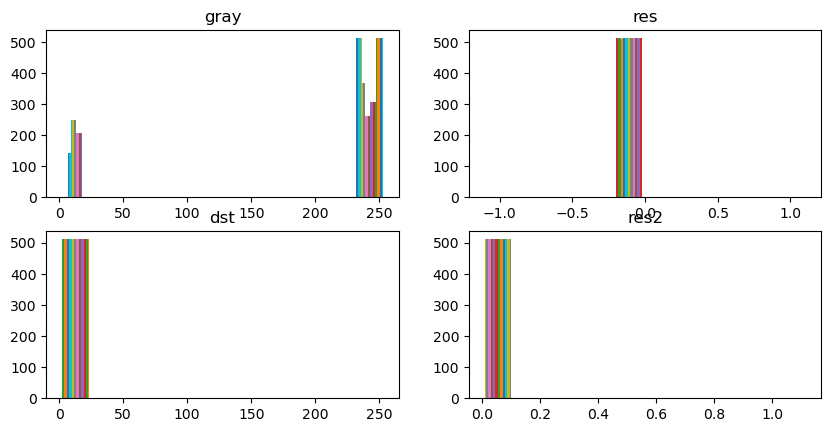

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))


fig.add_subplot(4,2,1)
plt.hist(gray)
plt.title('gray')

fig.add_subplot(4,2,2)
plt.hist(res)
plt.title('res')

fig.add_subplot(4,2,3)
plt.hist(dst)
plt.title('dst')

fig.add_subplot(4,2,4)
plt.hist(res2)
plt.title('res2')

In [9]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=3)
ret, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO)
points = np.argwhere(res2 > 0)


for center in points:
    y, x = center
    cv2.circle(src, (x, y), 3, (0, 0, 255), 2)


cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [45]:
def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src, kernel)
    localMax = (src == dilate)
    erode = cv2.erode(src, kernel)
    localMax2 = (src > erode)
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:, [0, 1]] = points[:, [1, 0]]
    return points

In [46]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=3)
_, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO)
points = findLocalMaxima(res2)
dst = src.copy()
for x, y in points:
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    cv2.circle(dst, (x, y), 4, (b, g, r), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', gray)
cv2.imshow('res2', res2)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [62]:
# 비트 연산 - 이진수로 바꿔서 같은 수가 있으면 나옴
print(10 & 8)
print(8 & 10)
print(4 & 5)
print(6 & 8)
print(12 & 24)
print(26 & 25)

8
8
4
0
8
24


In [7]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

eigen = cv2.cornerMinEigenVal(gray, blockSize=5)
corners = np.argwhere(eigen>0.2)
corners[:,[0,1]]= corners[:,[1,0]]

corners


for x, y in corners:
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    cv2.circle(src, (x, y), 4, (b, g, r), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('eigen', eigen)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [8]:
def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src, kernel)
    localMax = (src == dilate)
    erode = cv2.erode(src, kernel)
    localMax2 = (src > erode)
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:, [0, 1]] = points[:, [1, 0]]
    return points

src = cv2.imread('/Users/iseung-won/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=7)
_, res2 = cv2.threshold(np.abs(res), 0.2, 0, cv2.THRESH_TOZERO)
points = findLocalMaxima(res2)
len(points)
dst = src.copy()
for x, y in points:
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    cv2.circle(src, (x, y), 4, (b, g, r), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('res2', res2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [14]:
def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src, kernel)
    localMax = (src == dilate)
    erode = cv2.erode(src, kernel)
    localMax2 = (src > erode)
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:, [0, 1]] = points[:, [1, 0]]
    return points

src = cv2.imread('/Users/iseung-won/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

eigen = cv2.cornerMinEigenVal(gray, blockSize=7)
corners = np.argwhere(eigen>0.5)
corners[:,[0,1]]= corners[:,[1,0]]

# fig = plt.figure(figsize=(10,10))
# plt.hist(eigen)
# plt.show()

for x, y in corners:
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    cv2.circle(src, (x, y), 4, (b, g, r), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('eigen', eigen)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [15]:

src = cv2.imread('/Users/iseung-won/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

eigen = cv2.cornerMinEigenVal(gray, blockSize=11)
points = findLocalMaxima(eigen)

# fig = plt.figure(figsize=(10,10))
# plt.hist(eigen)
# plt.show()

for x, y in points:
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    cv2.circle(src, (x, y), 4, (b, g, r), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('eigen', eigen)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [180]:
src = cv2.imread('/Users/iseung-won/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=5,ksize=3, k=0.01)
ret, res2 = cv2.threshold(np.abs(res), 0.001, 0, cv2.THRESH_TOZERO)
points = findLocalMaxima(res2)
for x, y in points:
    cv2.circle(src, (x, y), 4, (0, 0, 255), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('eigen', eigen)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [188]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=5, ksize=3, k=0.01)
ret, res2 = cv2.threshold(np.abs(res), 0.01, 0, cv2.THRESH_TOZERO)

points = findLocalMaxima(res2)
for x, y in points:
    cv2.circle(src, (x, y), 4, (0, 0, 255), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('eigen', eigen)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [189]:
#강사님 코드

src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=5, ksize=3, k=0.01) # 해리스에서 지정하는 k 상수
ret, res2 = cv2.threshold(np.abs(res), 0.005, 0, cv2.THRESH_TOZERO) # 임계값 0.02 기준, res 절대값 낮으면 0, 높으면 원래 값
corners = findLocalMaxima(res2) # 위 함수에 적용, 로컬 맥시마 위치 저장
print('corners =', corners) # 코너 좌표 출력
dst = src.copy()
for x, y in corners:
    cv2.circle(dst, (x, y), 3, (0, 0, 255), 2)
cv2.imshow('cornerHarris', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

corners = [[109 127]
 [264 127]
 [267 167]
 [386 170]
 [109 268]
 [167 271]
 [170 374]
 [386 374]]


-1

In [214]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(30)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))
print(len(kp))
print(kp)
cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

48
(< cv2.KeyPoint 0x7f986017da50>, < cv2.KeyPoint 0x7f986017d9c0>, < cv2.KeyPoint 0x7f986014d090>, < cv2.KeyPoint 0x7f986014d720>, < cv2.KeyPoint 0x7f986014d270>, < cv2.KeyPoint 0x7f986014d180>, < cv2.KeyPoint 0x7f986014de70>, < cv2.KeyPoint 0x7f986014d450>, < cv2.KeyPoint 0x7f9860114d80>, < cv2.KeyPoint 0x7f9860157b10>, < cv2.KeyPoint 0x7f98601577b0>, < cv2.KeyPoint 0x7f98601571e0>, < cv2.KeyPoint 0x7f9860157630>, < cv2.KeyPoint 0x7f9860157330>, < cv2.KeyPoint 0x7f9860157780>, < cv2.KeyPoint 0x7f98600a0ba0>, < cv2.KeyPoint 0x7f98600a0270>, < cv2.KeyPoint 0x7f98600a0a50>, < cv2.KeyPoint 0x7f98600a0f00>, < cv2.KeyPoint 0x7f98600a0ab0>, < cv2.KeyPoint 0x7f98600a0870>, < cv2.KeyPoint 0x7f98600a0420>, < cv2.KeyPoint 0x7f98600a0990>, < cv2.KeyPoint 0x7f98600a05a0>, < cv2.KeyPoint 0x7f98600a0150>, < cv2.KeyPoint 0x7f98600a0b70>, < cv2.KeyPoint 0x7f98600a0cc0>, < cv2.KeyPoint 0x7f98600a03c0>, < cv2.KeyPoint 0x7f98600a5870>, < cv2.KeyPoint 0x7f98600a51e0>, < cv2.KeyPoint 0x7f98600a5960>, < cv

-1

In [212]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(30)

kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))
print(len(kp))

cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

3


-1

In [213]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(0)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))
print(len(kp))
cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

89


-1

In [219]:
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(200)

kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))
print(len(kp))
cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

3


-1

In [215]:
src = cv2.imread('/Users/iseung-won/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(50)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))

cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [216]:
src = cv2.imread('/Users/iseung-won/lena.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(50)

kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))

cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [208]:
src = cv2.imread('/Users/iseung-won/baboon.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create(90)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0,0,255))

cv2.imshow('Fast', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [221]:
# 강사님 코드

import cv2
import numpy as np
src = cv2.imread('/Users/iseung-won/CornerTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create(30)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
print(len(kp))
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0, 0, 255))
cv2.imshow('FAST', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

48


-1

In [10]:
# findChessboardCorners

src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
found, corners = cv2.findChessboardCorners(gray, patternSize=(6,3))
dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize=(6,3),corners=corners, patternWasFound=found)
cv2.imshow('chessboard', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

In [236]:
# FastFeatureDetector

src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create(45)
fast.setNonmaxSuppression(0)
kp = fast.detect(src, None)
print(len(kp))
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0, 0, 255))
cv2.imshow('FAST', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

505


-1

In [11]:
# FastFeatureDetector

src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
fast = cv2.FastFeatureDetector_create(26)

kp = fast.detect(src, None)
print(len(kp))
dst = src.copy()
cv2.drawKeypoints(src, kp, dst, (0, 0, 255))
cv2.imshow('FAST', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

107


-1

In [274]:
# cornerHarris

src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.cornerHarris(gray, blockSize=3, ksize=5, k=0.01) # 해리스에서 지정하는 k 상수
ret, res2 = cv2.threshold(np.abs(res), 0.1, 0, cv2.THRESH_TOZERO) # 임계값 0.02 기준, res 절대값 낮으면 0, 높으면 원래 값
corners = findLocalMaxima(res2) # 위 함수에 적용, 로컬 맥시마 위치 저장
print('corners =', len(corners)) # 코너 좌표 출력
dst = src.copy()
for x, y in corners:
    cv2.circle(dst, (x, y), 3, (0, 0, 255), 2)
cv2.imshow('cornerHarris', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

corners = 39


-1

In [285]:
# cornerMinEigenVal

src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

eigen = cv2.cornerMinEigenVal(gray, blockSize=5)
corners = np.argwhere(eigen>0.03)
corners[:,[0,1]]= corners[:,[1,0]]


for x, y in corners:

    cv2.circle(src, (x, y), 4, (0, 0, 255), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('eigen', eigen)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
print(len(corners))

492


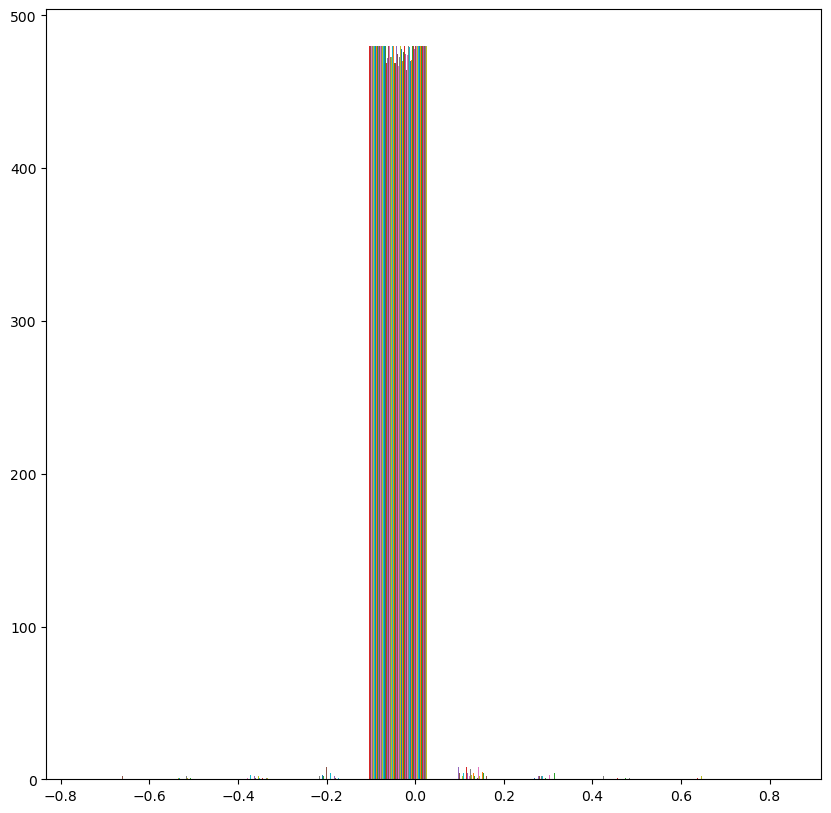

38


In [12]:
# preCornerDetect

def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src, kernel)
    localMax = (src == dilate)
    erode = cv2.erode(src, kernel)
    localMax2 = (src > erode)
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:, [0, 1]] = points[:, [1, 0]]
    return points

src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=5)

fig = plt.figure(figsize=(10,10))
plt.hist(res)
plt.show()


ret, res2 = cv2.threshold(np.abs(res), 0.4, 0, cv2.THRESH_TOZERO)
points = findLocalMaxima(res2)
len(points)
dst = src.copy()
for x, y in points:
    cv2.circle(src, (x, y), 4, (0,0,255), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('res2', res2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

print(len(points))

In [296]:
# findChessboardCorners with ChessBoard.jpg 강사님 코드
src = cv2.imread('/Users/iseung-won/chessBoard.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
patternSize = (6, 3) # 가로 6개 세로 3개
found, corners = cv2.findChessboardCorners(gray, patternSize)
print('corners.shape =', corners.shape)
dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize, corners, found)
cv2.imshow('Chessboard', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

corners.shape = (18, 1, 2)


-1

In [303]:
src = cv2.imread('/Users/iseung-won/circleGrid.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
found, corners = cv2.findCirclesGrid(gray, patternSize=(6,4))
dst = src.copy()
cv2.drawChessboardCorners(dst, patternSize=(6,4), corners=corners, patternWasFound=found)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

libpng warning: bKGD: invalid


-1

libpng warning: bKGD: invalid


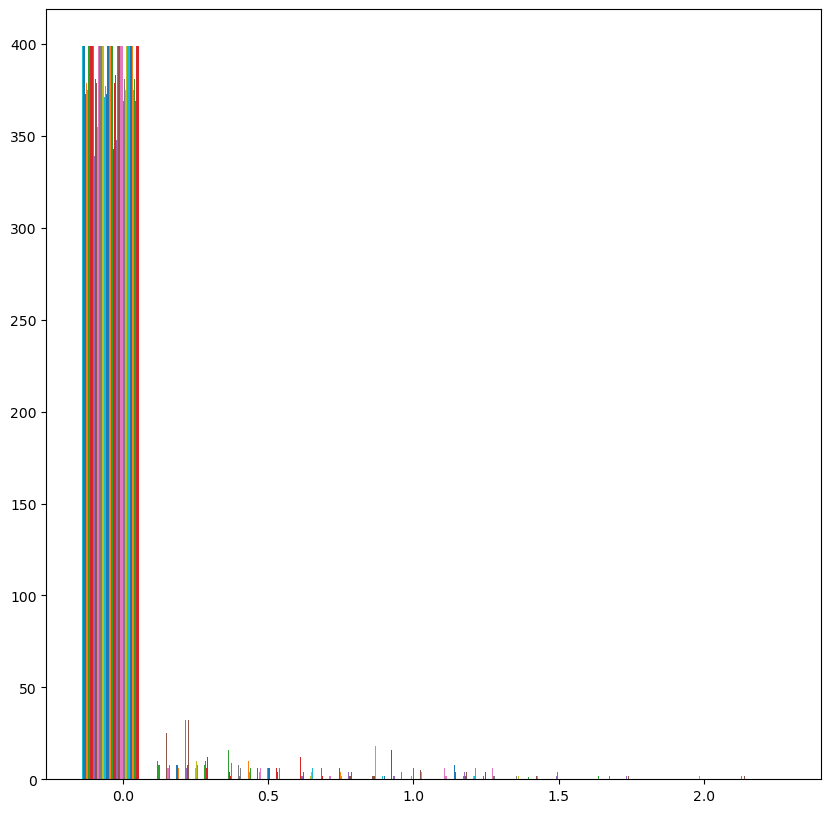

192


In [306]:
# preCornerDetect

def findLocalMaxima(src):
    kernel = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(11,11))
    dilate = cv2.dilate(src, kernel)
    localMax = (src == dilate)
    erode = cv2.erode(src, kernel)
    localMax2 = (src > erode)
    localMax &= localMax2
    points = np.argwhere(localMax == True)
    points[:, [0, 1]] = points[:, [1, 0]]
    return points

src = cv2.imread('/Users/iseung-won/circleGrid.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
res = cv2.preCornerDetect(gray, ksize=5)

fig = plt.figure(figsize=(10,10))
plt.hist(res)
plt.show()


ret, res2 = cv2.threshold(np.abs(res), 0.4, 0, cv2.THRESH_TOZERO)
points = findLocalMaxima(res2)
len(points)
dst = src.copy()
for x, y in points:
    cv2.circle(src, (x, y), 4, (0,0,255), 2) # corners 이용 작은 원 그리기
cv2.imshow('src', src)
cv2.imshow('res2', res2)

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

print(len(points))

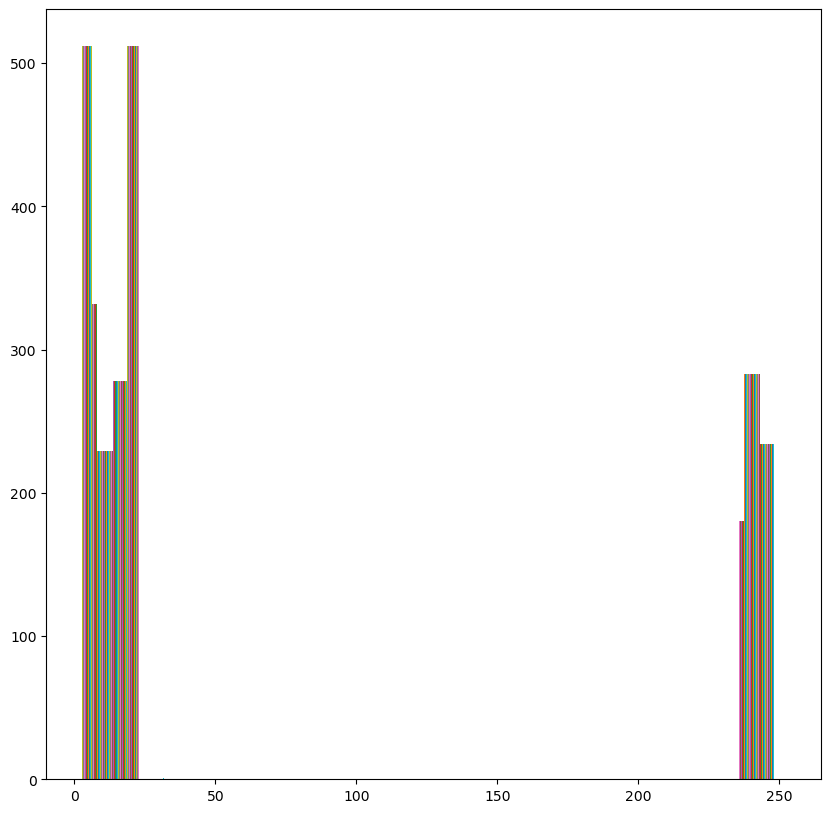

In [308]:
src= cv2.imread('/Users/iseung-won/momentTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
fig=plt.figure(figsize=(10,10))
plt.hist(gray)
plt.show()

In [17]:
src= cv2.imread('/Users/iseung-won/momentTest.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

ret, blmage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

mode = cv2.RETR_EXTERNAL
methos = cv2.CHAIN_APPROX_SIMPLE
contours, _ = cv2.findContours(blmage, mode, methos)
dst = src.copy()
cnt= contours[0]
M = cv2.moments(cnt)
hu = cv2.HuMoments(M)
print('hu.shape =', hu.shape)
print('hu =', hu)

angle = 45.0 # 원본 영상 45도 회전
scale = 0.2 # 사이즈도 20%로 변경
cx = M['m10']/M['m00']
cy = M['m01']/M['m00']
center = (cx, cy)
t = (20,30) # 이만큼 이동

A = cv2.getRotationMatrix2D(center, angle, scale)
A[:,2] += t # translation
cnt2 = cv2.transform(cnt, A) # 변경 적용
M2 = cv2.moments(cnt2)
hu2 = cv2.HuMoments(M2)
diffSum = np.sum(cv2.absdiff(hu, hu2))
print('hu2.shape =', hu2.shape)
print('hu2 =', hu2)
print('diffSum =', diffSum)

cv2.drawContours(dst, [cnt2], 0, (0,255,0), 3)
cv2.drawContours(dst,[cnt],0,(255,0,0),3)
cv2.imshow('cnt', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

# print(contours)
# print(_)

hu.shape = (7, 1)
hu = [[ 1.72272960e-01]
 [ 2.17960438e-03]
 [ 9.24428655e-05]
 [ 1.90785217e-06]
 [ 1.11977849e-12]
 [-6.96325160e-09]
 [-2.53121609e-11]]
hu2.shape = (7, 1)
hu2 = [[ 1.71993727e-01]
 [ 2.20668974e-03]
 [ 7.76013960e-05]
 [ 1.49675473e-06]
 [ 3.17817500e-14]
 [-7.44069092e-09]
 [-1.61309477e-11]]
diffSum = 0.0003215707378081359


-1

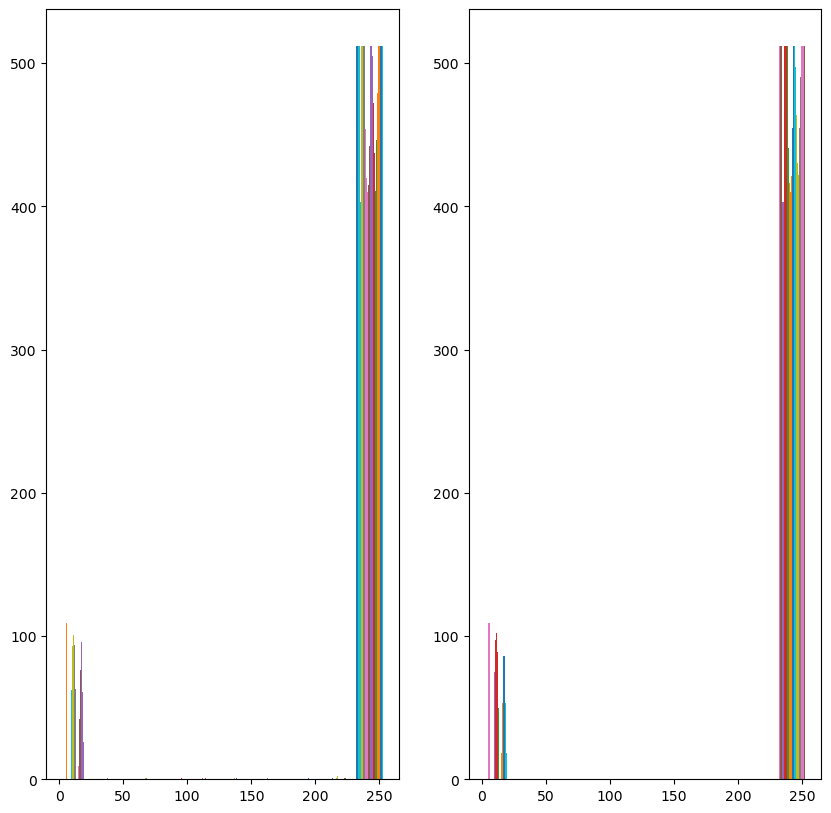

In [324]:
src= cv2.imread('/Users/iseung-won/refShapes.jpg')
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
ret, blmage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

fig=plt.figure(figsize=(10,10))
ax1 = plt.subplot(121)
plt.hist(gray)
ax2 = plt.subplot(122)
plt.hist(blmage)
plt.show()

In [18]:
ref_src= cv2.imread('/Users/iseung-won/refShapes.jpg')
test_src= cv2.imread('/Users/iseung-won/testShapes.jpg')
gray = cv2.cvtColor(ref_src, cv2.COLOR_BGR2GRAY)
ret, blmage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
dst = ref_src.copy()
mode = cv2.RETR_EXTERNAL
methos = cv2.CHAIN_APPROX_SIMPLE
contours, _ = cv2.findContours(blmage, mode, methos)
contours2, _ = cv2.findContours(blmage, mode, methos)

cnt0 = contours[0]
M0 = cv2.moments(cnt0)
hu0 = cv2.HuMoments(M0)
cnt1 = contours[1]
M1 = cv2.moments(cnt1)
hu1 = cv2.HuMoments(M1)
cnt2 = contours[2]
M2 = cv2.moments(cnt2)
hu2 = cv2.HuMoments(M2)
print('hu.shape =', hu0.shape)
print('hu =', hu)
print('hu1.shape =', hu1.shape)
print('hu =', hu1)
print('hu2.shape =', hu2.shape)
print('hu =', hu2)
cv2.drawContours(dst,[cnt0],0,(255,0,0),3)
cv2.drawContours(dst,[cnt1],0,(255,0,0),3)
cv2.drawContours(dst,[cnt2],0,(255,0,0),3)


cv2.imshow('cnt', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

hu.shape = (7, 1)
hu = [[ 1.72272960e-01]
 [ 2.17960438e-03]
 [ 9.24428655e-05]
 [ 1.90785217e-06]
 [ 1.11977849e-12]
 [-6.96325160e-09]
 [-2.53121609e-11]]
hu1.shape = (7, 1)
hu = [[ 3.05814203e-01]
 [ 6.57667673e-02]
 [ 4.48727108e-09]
 [ 4.72798934e-10]
 [-3.87406943e-19]
 [-1.09143858e-10]
 [ 5.69359905e-19]]
hu2.shape = (7, 1)
hu = [[ 1.92227733e-01]
 [ 2.10625309e-07]
 [ 4.52098684e-03]
 [ 7.97607524e-09]
 [ 3.91161684e-14]
 [ 3.19227059e-12]
 [-2.76399218e-14]]


-1

In [20]:
ref_src= cv2.imread('/Users/iseung-won/refShapes.jpg')
test_src= cv2.imread('/Users/iseung-won/testShapes.jpg')
gray = cv2.cvtColor(ref_src, cv2.COLOR_BGR2GRAY)
ret, blmage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
dst = ref_src.copy()
mode = cv2.RETR_EXTERNAL
methos = cv2.CHAIN_APPROX_SIMPLE
contours, _ = cv2.findContours(blmage, mode, methos)
contours2, _ = cv2.findContours(blmage, mode, methos)

cnt0 = contours[0]
M0 = cv2.moments(cnt0)
hu0 = cv2.HuMoments(M0)
cnt1 = contours[1]
M1 = cv2.moments(cnt1)
hu1 = cv2.HuMoments(M1)
cnt2 = contours[2]
M2 = cv2.moments(cnt2)
hu2 = cv2.HuMoments(M2)

cv2.drawContours(dst,[cnt0],0,(255,0,0),3)
cv2.drawContours(dst,[cnt1],0,(255,0,0),3)
cv2.drawContours(dst,[cnt2],0,(255,0,0),3)


cv2.imshow('cnt', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)


ref_src= cv2.imread('/Users/iseung-won/refShapes.jpg')
test_src= cv2.imread('/Users/iseung-won/testShapes.jpg')
gray = cv2.cvtColor(test_src, cv2.COLOR_BGR2GRAY)
ret, blmage = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY_INV)
dst = test_src.copy()
mode = cv2.RETR_EXTERNAL
methos = cv2.CHAIN_APPROX_SIMPLE
contours, _ = cv2.findContours(blmage, mode, methos)


for i in range(len(contours)):
    globals()[f'cnt{i+3}'] = contours[i]
    globals()[f'M{i}'] = cv2.moments(globals()[f'cnt{i+3}'])
    globals()[f'hu{i+3}'] = cv2.HuMoments(globals()[f'M{i}'])



cv2.drawContours(dst,[cnt3],0,(255,0,0),3)
cv2.drawContours(dst,[cnt4],0,(255,0,0),3)
cv2.drawContours(dst,[cnt5],0,(255,0,0),3)
cv2.drawContours(dst,[cnt6],0,(255,0,0),3)
cv2.drawContours(dst,[cnt7],0,(255,0,0),3)
cv2.drawContours(dst,[cnt8],0,(255,0,0),3)
cv2.drawContours(dst,[cnt9],0,(255,0,0),3)
cv2.drawContours(dst,[cnt10],0,(255,0,0),3)
cv2.drawContours(dst,[cnt11],0,(255,0,0),3)
cv2.drawContours(dst,[cnt12],0,(255,0,0),3)

print(len(contours))
cv2.imshow('cnt', dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

for i in range(13):

    print(f'hu{i}', globals()[f'hu{i}'])



10
hu0 [[ 1.59174584e-01]
 [ 2.68787079e-06]
 [ 2.74115386e-08]
 [ 5.80005467e-13]
 [-5.12066832e-23]
 [-6.94287660e-16]
 [-5.22144324e-23]]
hu1 [[ 3.05814203e-01]
 [ 6.57667673e-02]
 [ 4.48727108e-09]
 [ 4.72798934e-10]
 [-3.87406943e-19]
 [-1.09143858e-10]
 [ 5.69359905e-19]]
hu2 [[ 1.92227733e-01]
 [ 2.10625309e-07]
 [ 4.52098684e-03]
 [ 7.97607524e-09]
 [ 3.91161684e-14]
 [ 3.19227059e-12]
 [-2.76399218e-14]]
hu3 [[ 3.05814203e-01]
 [ 6.57667673e-02]
 [ 4.48727107e-09]
 [ 4.72798933e-10]
 [-3.87406945e-19]
 [-1.09143858e-10]
 [-5.69359900e-19]]
hu4 [[ 1.92897284e-01]
 [ 1.87072111e-04]
 [ 4.57225892e-03]
 [ 6.15586206e-06]
 [ 1.03275018e-09]
 [ 8.41959337e-08]
 [-4.11432946e-12]]
hu5 [[3.09312858e-01]
 [6.79129099e-02]
 [3.44025931e-09]
 [2.69628115e-09]
 [8.21030566e-18]
 [6.88552475e-10]
 [1.61521949e-19]]
hu6 [[ 1.59705650e-01]
 [ 1.60973442e-04]
 [ 9.57533897e-08]
 [ 2.32718514e-10]
 [ 1.09854972e-18]
 [ 2.94083168e-12]
 [-4.57307252e-21]]
hu7 [[1.92055227e-01]
 [2.12422028e-05

In [372]:
diffSum06 = np.sum(cv2.absdiff(hu0, hu6))
diffSum06 = np.sum(cv2.absdiff(hu0, hu6))
print(diffSum)

0.0006894195640093897


In [21]:
import cv2
import numpy as np
ref_src= cv2.imread('/Users/iseung-won/refShapes.jpg')
test_src= cv2.imread('/Users/iseung-won/testShapes.jpg')
ref_gray = cv2.cvtColor(ref_src, cv2.COLOR_BGR2GRAY)
ret, ref_bin = cv2.threshold(ref_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

test_gray = cv2.cvtColor(test_src, cv2.COLOR_BGR2GRAY)
ret, test_bin = cv2.threshold(test_gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
mode = cv2.RETR_EXTERNAL
method = cv2.CHAIN_APPROX_SIMPLE
ref_contours, _ = cv2.findContours(ref_bin, mode, method)
test_contours, _ = cv2.findContours(test_bin, mode, method)
ref_dst = ref_src.copy()
colors = ((0,0,255), (0,255,0), (255,0,0))
for i, cnt in enumerate(ref_contours):
    cv2.drawContours(ref_dst, [cnt], 0, colors[i], 2)
test_dst = test_src.copy()
method = cv2.CONTOURS_MATCH_I1
for i, cnt1 in enumerate(test_contours):
    matches = []
    for cnt2 in ref_contours:
        ret = cv2.matchShapes(cnt1, cnt2, method, 0)
        matches.append(ret)
    k = np.argmin(matches)
    cv2.drawContours(test_dst, [cnt1], 0, colors[k], 2)
cv2.imshow('reference', ref_dst)
cv2.imshow('test', test_dst)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)

-1